## For This project we have given an Optical recognition of handwritten digitsdataset , included with the scikit-learn library , consists of 8*8 graysacale images of hand-written digits sorted into classes 0-9. When you load the dataset using scikit-learn, you can access the numbers as a list of features (the pixel values of each picture) and their corresponding labels (the number that the picture represents). For that we have given 3 task to be perform to check our Model Accuracy.








**Task 1: To recognize the digits in the Optical recognition of handwritten digits dataset**, we first need to separate the dataset into two groups: a training set and a test set. The training set will be used to teach a fully-connected neural network how to recognize the digits, while the test set will be used to evaluate how well the neural network performs on new, unseen data.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


Above here , The "load_digits" library allows us to load a specific dataset, in this case the Optical recognition of handwritten digits dataset. Once the dataset is loaded, we can use the "train_test_split" function to separate it into a training set and a test set.

In [3]:
# Load the digits dataset
digits = load_digits()

X = digits.data
Y = digits.target


Here we need to create pixel values of each image in the dataset in X and numbers that each image represents (0-9) in Y. 

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

The percentage of the dataset that should be allotted to the test set is specified by the "test size" option. Setting it to 0.2 in this instance means that 80% of the dataset will be utilized for training and 20% will be used for testing.

In [5]:
# Normalize the input data to have values between 0 and 1
X_train = X_train / 16.0
X_test = X_test / 16.0

This reduces the dataset's pixel values, which vary from 0 to 16, to a range between 0 and 1. so that we can get better accurate results.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

This code imports a number of TensorFlow modules, a very well library for creating and improving machine learning models. we have added different models,layers, and optimizers.

In [7]:
# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

The neural network's learning process is configured via the "compile" approach, which also involves providing the loss function, optimizer, and evaluation metrics.

In [9]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
36/36 [==============================] - 1s 10ms/step - loss: 2.0130 - accuracy: 0.4334 - val_loss: 1.6367 - val_accuracy: 0.7153
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.8433 - val_loss: 0.7619 - val_accuracy: 0.8507
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.9121 - val_loss: 0.4010 - val_accuracy: 0.9236
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 0.3019 - accuracy: 0.9365 - val_loss: 0.2611 - val_accuracy: 0.9583
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9513 - val_loss: 0.2448 - val_accuracy: 0.9410
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9600 - val_loss: 0.1797 - val_accuracy: 0.9583
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.9765 - val_loss: 0.1473 - val_accuracy: 0.9688
Epoch 8/10
36/36 [=

The fit method is used to train the model on a given dataset by iteratively adjusting the weights of the neural network to minimize the loss function.

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

12/12 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9472
Test accuracy: 0.9472222328186035


As we can see our model accuracy is pretty good around 95%. we can procced forward to next task.

**Task 2 : Dump the trained weights and biases from the model as NumPy arrays for each layer.**

In [34]:
X_train[0]

array([0.    , 0.    , 0.4375, 1.    , 1.    , 1.    , 0.8125, 0.    ,
       0.    , 0.    , 0.5   , 0.5625, 0.5   , 0.9375, 0.9375, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.25  , 1.    , 0.4375, 0.    ,
       0.    , 0.    , 0.25  , 0.5   , 0.75  , 1.    , 0.3125, 0.    ,
       0.    , 0.1875, 1.    , 1.    , 1.    , 0.875 , 0.4375, 0.    ,
       0.    , 0.    , 0.1875, 0.5   , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.9375, 0.8125, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.4375, 1.    , 0.1875, 0.    , 0.    , 0.    ])

In [14]:
w1,b1, w2,b2, w3, b3 = model.get_weights()

Here w represent weights and b represent biases.

In [15]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum()

The first line of the function computes the exponential of each element in the input vector "z" using the NumPy "exp" function.

In [16]:
def relu(z):
    return np.maximum(0, z)

The relu function is commonly used in neural networks as an activation function for hidden layers, where the goal is to introduce non-linearity into the network.

In [18]:
def predict(input):
    sum1 = np.dot(np.transpose(w1),input) + b1
    z1 = relu(sum1)
    
    sum2 = np.dot(np.transpose(w2),z1) + b2
    z2 = relu(sum2)
    
    sum3 = np.dot(np.transpose(w3),z2) + b3
    z3 = softmax(sum3)
    
    return np.argmax(z3);


The function first computes the output of the first hidden layer by taking the dot product between the input vector and the weights for the first layer, adding the bias term, and applying the ReLU activation function.After that applies to other layers same as.

In [20]:
predict(X_test[1])

6

From this we can conclude that the first predicted digit would be 6.


**Task 3 : Verify your code’s predictions by plotting images for several results in each class.**

In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

The matplotlib.pyplot module is a library used for creating visualizations and plots in Python. In this code, it will be used to visualize the training and validation accuracy and loss of the neural network.

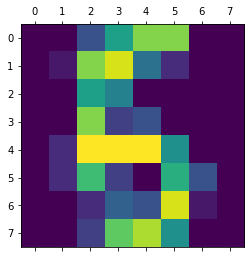

In [32]:
plt.matshow(X_test[1].reshape(8,8))

It will display an 8x8 matrix of pixels as an image ,and the result shows that output is perfectly match for this class , it represents our model works precise. as it should be predict 6 gidit as we have number 6 as a handwritten image. 

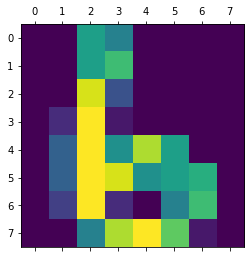

In [33]:
plt.matshow(X_test[4].reshape(8,8))

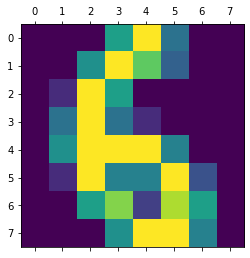

In [31]:
plt.matshow(X_test[6].reshape(8,8))

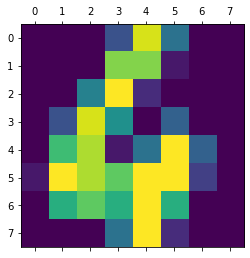

In [25]:
plt.matshow(X_test[10].reshape(8,8))

From this above results shows that this model is making good predictions! However, it's important to evaluate the performance of the model using appropriate metrics, such as accuracy.